In [11]:
setwd('C:/Users/dell/PycharmProjects/MachineLearning/Pandas/datasets')

In [1]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

In [13]:
wind <- read.csv('./electric_production.csv')
head(wind)

DATE,IPG2211A2N
1/1/1985,72.5052
2/1/1985,70.6720
3/1/1985,62.4502
4/1/1985,57.4714
5/1/1985,55.3151
6/1/1985,58.0904


In [15]:
data(economics, economics_long)
head(economics)

date,pce,pop,psavert,uempmed,unemploy
1967-07-01,506.7,198712,12.6,4.5,2944
1967-08-01,509.8,198911,12.6,4.7,2945
1967-09-01,515.6,199113,11.9,4.6,2958
1967-10-01,512.2,199311,12.9,4.9,3143
1967-11-01,517.4,199498,12.8,4.7,3066
1967-12-01,525.1,199657,11.8,4.8,3018


In [19]:
head(economics_long)

date,variable,value,value01
1967-07-01,pce,506.7,0.0000000000
1967-08-01,pce,509.8,0.0002652497
1967-09-01,pce,515.6,0.0007615234
1967-10-01,pce,512.2,0.0004706043
1967-11-01,pce,517.4,0.0009155394
1967-12-01,pce,525.1,0.0015743854


# Connect Observations

`geom_path()` connects the observations in the order in which they appear in the data. `geom_line()` connects them in order of the variable on the x axis. `geom_step()` creates a stairstep plot, highlighting exactly when changes occur. The group aesthetic determines which cases are connected together.

```R
geom_path(
  mapping = NULL,
  data = NULL,
  stat = "identity",
  position = "identity",
  ...,
  lineend = "butt",
  linejoin = "round",
  linemitre = 10,
  arrow = NULL,
  na.rm = FALSE,
  show.legend = NA,
  inherit.aes = TRUE
)

geom_line(
  mapping = NULL,
  data = NULL,
  stat = "identity",
  position = "identity",
  na.rm = FALSE,
  orientation = NA,
  show.legend = NA,
  inherit.aes = TRUE,
  ...
)

geom_step(
  mapping = NULL,
  data = NULL,
  stat = "identity",
  position = "identity",
  direction = "hv",
  na.rm = FALSE,
  show.legend = NA,
  inherit.aes = TRUE,
  ...
)
```

**Arguments**  
`lineend`	
Line end style (round, butt, square).

`linejoin`	
Line join style (round, mitre, bevel).

`linemitre`	
Line mitre limit (number greater than 1).

`arrow`	
Arrow specification, as created by grid::arrow().

# Aesthetic


**`geom_path()`** understands the following aesthetics (required aesthetics are in bold):

* **x**

* **y**

* alpha

* colour

* group

* linetype

* size

# Example

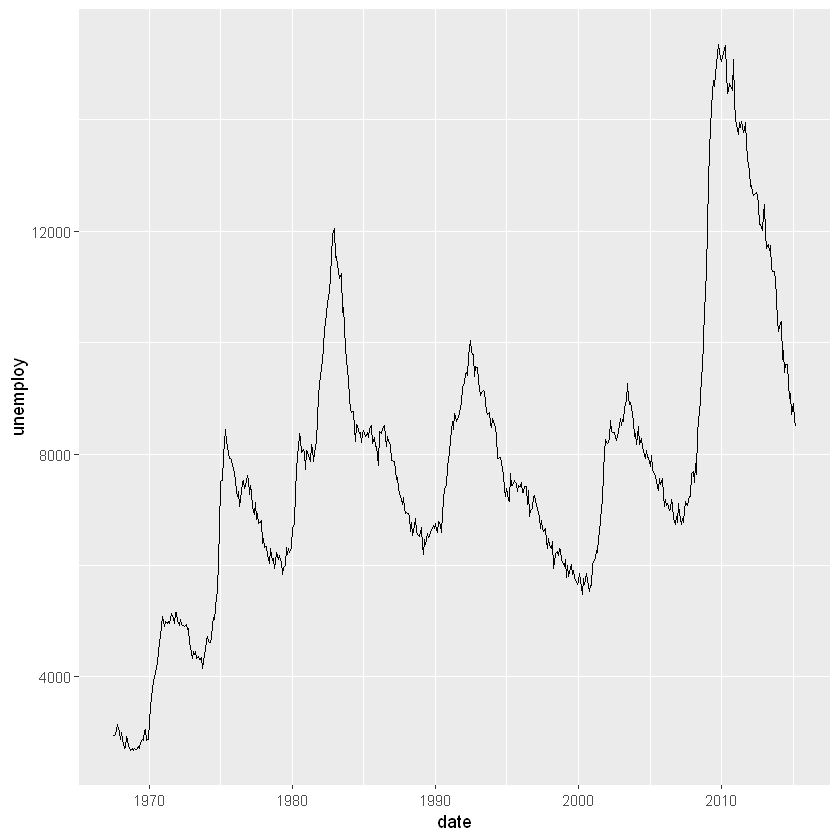

In [18]:
ggplot(economics, aes(date, unemploy)) +
geom_line()

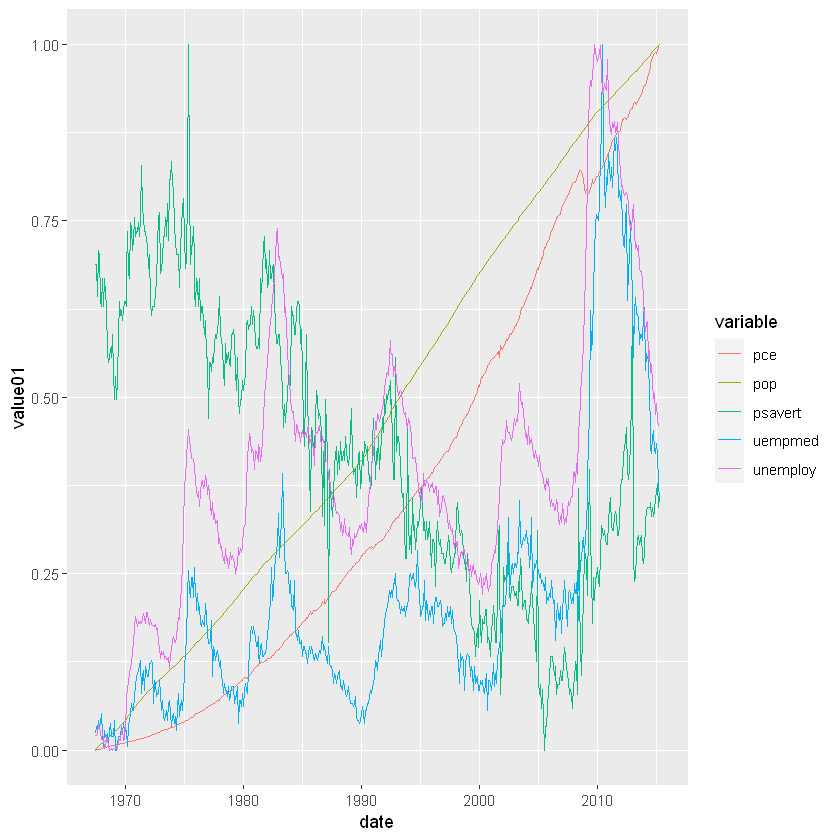

In [21]:
ggplot(economics_long, aes(date, value01, color = variable)) +
geom_line()

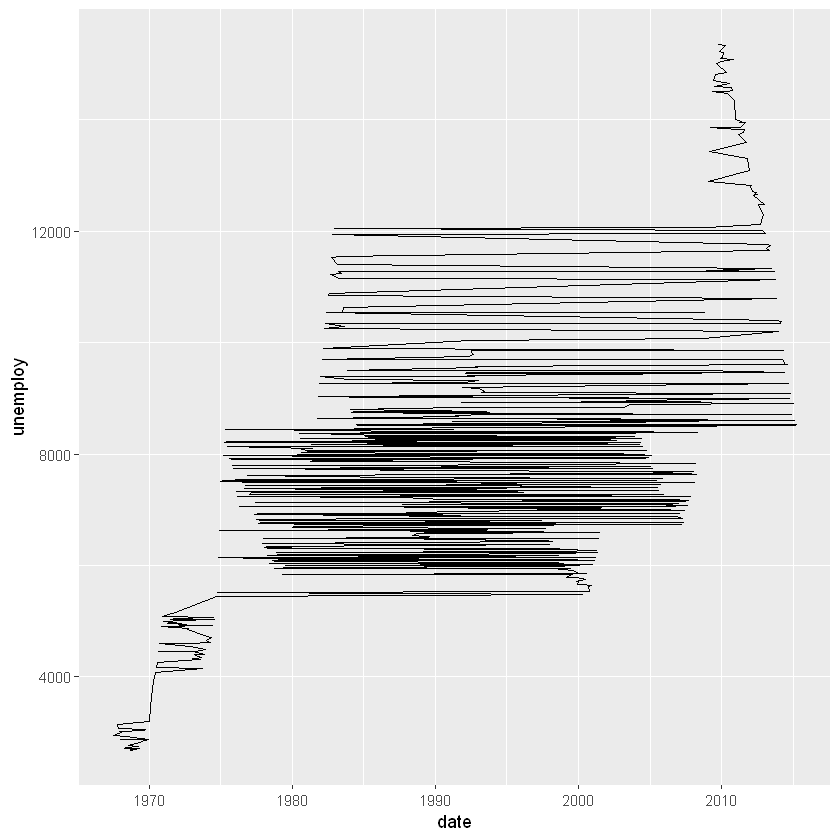

In [25]:
# You can get a timeseries that run vertically by setting the orientation
ggplot(economics, aes(date, unemploy)) +
geom_line(orientation = 'y')

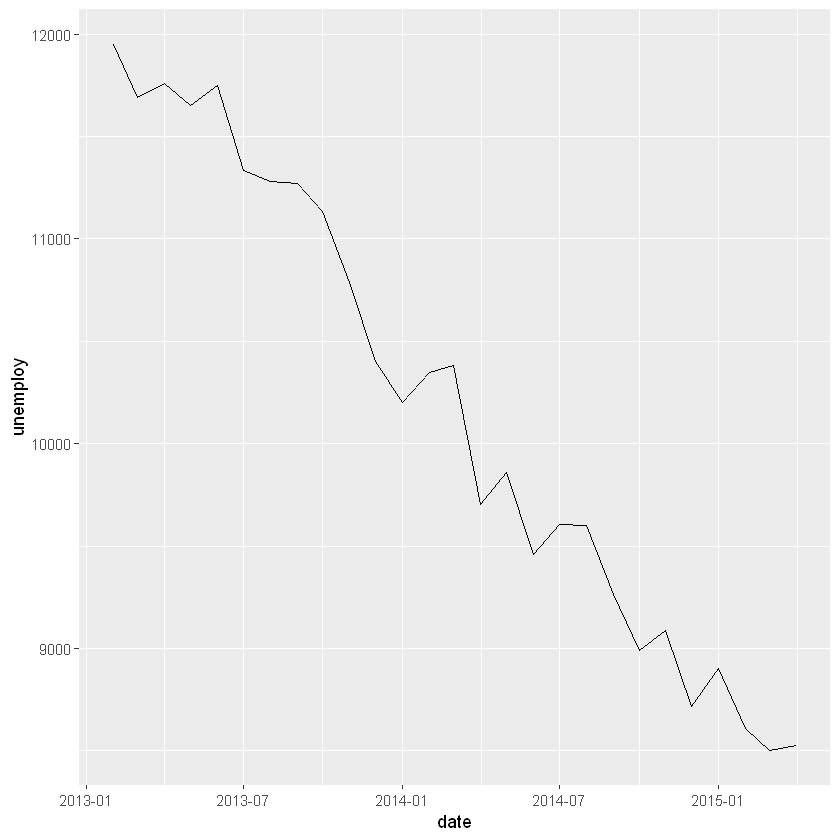

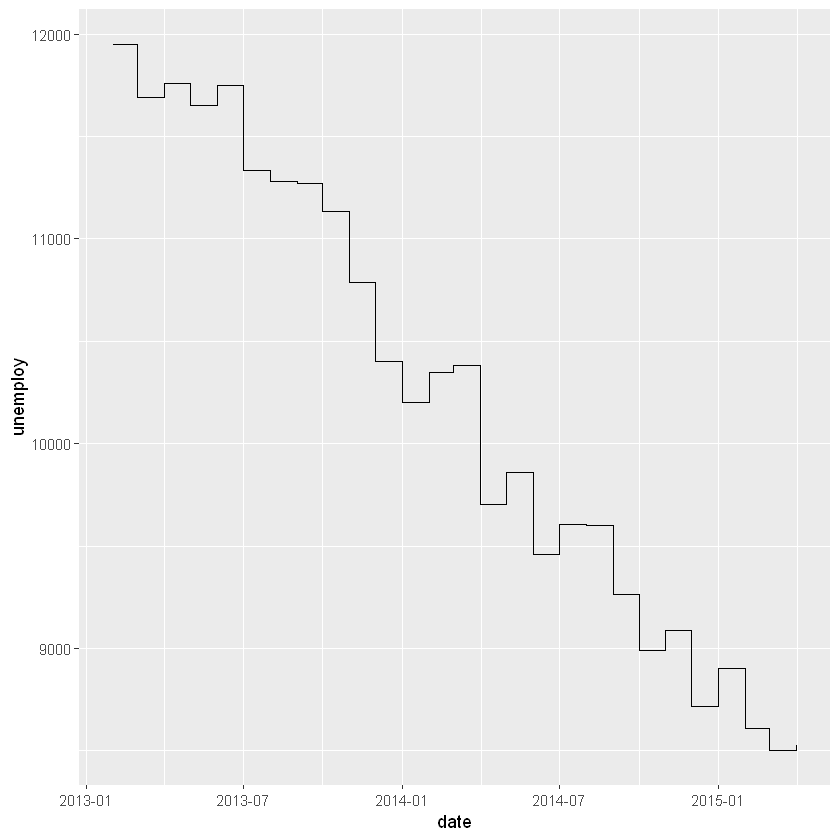

In [26]:
# geom_step() is useful when you want to highlight exactly when
# the y value changes
recent <- economics[economics$date > as.Date("2013-01-01"), ]
ggplot(recent, aes(date, unemploy)) + geom_line()
ggplot(recent, aes(date, unemploy)) + geom_step()


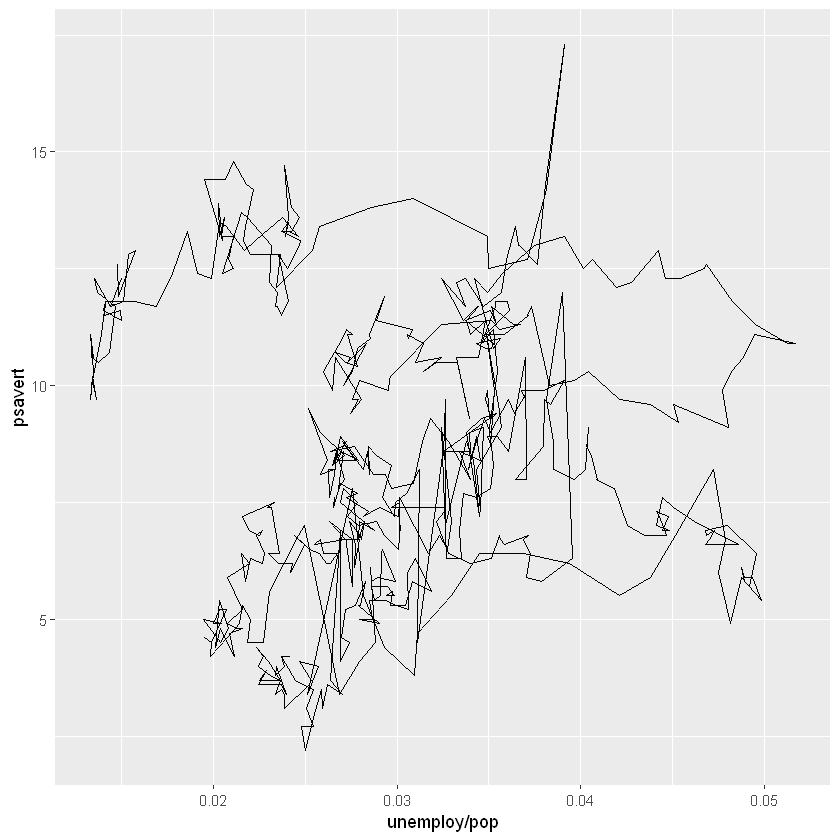

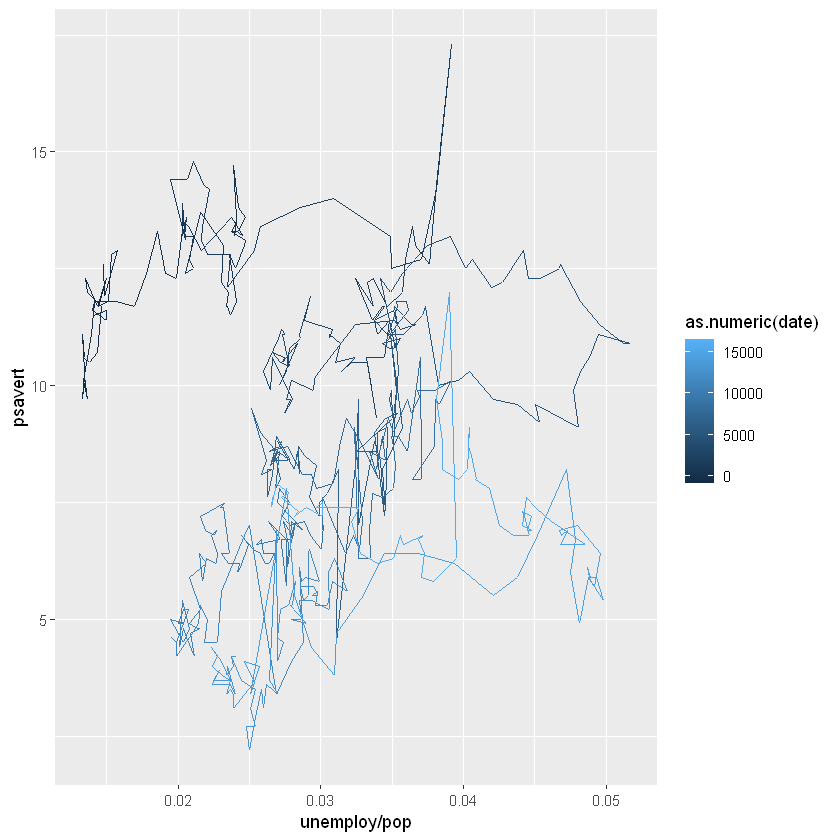

In [27]:
# geom_path lets you explore how two variables are related over time,
# e.g. unemployment and personal savings rate
m <- ggplot(economics, aes(unemploy/pop, psavert))
m + geom_path()
m + geom_path(aes(colour = as.numeric(date)))

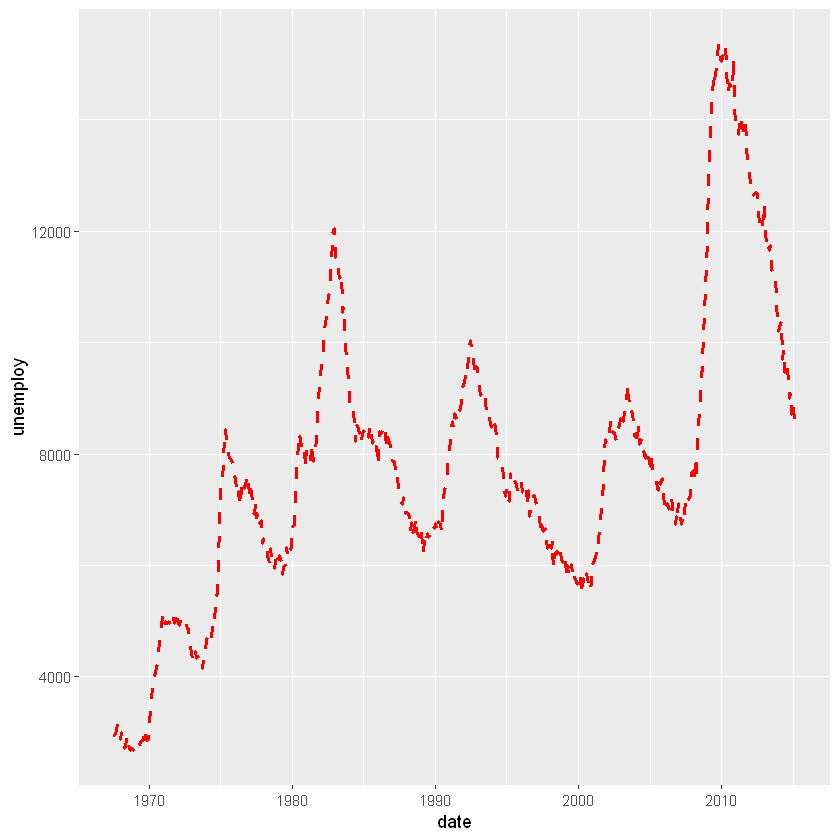

In [29]:
#customization
#linewidth = 1
#linestyle = '--'
#color = 'red'
ggplot(economics, aes(date, unemploy)) +
geom_line(linetype = 'dashed', size = 1, color = 'red')

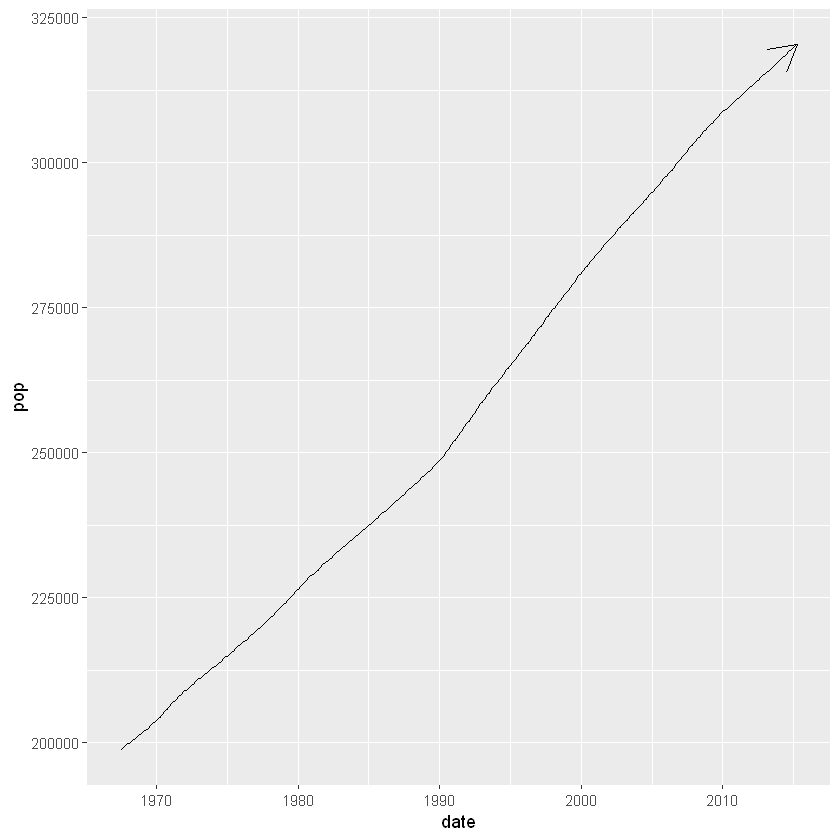

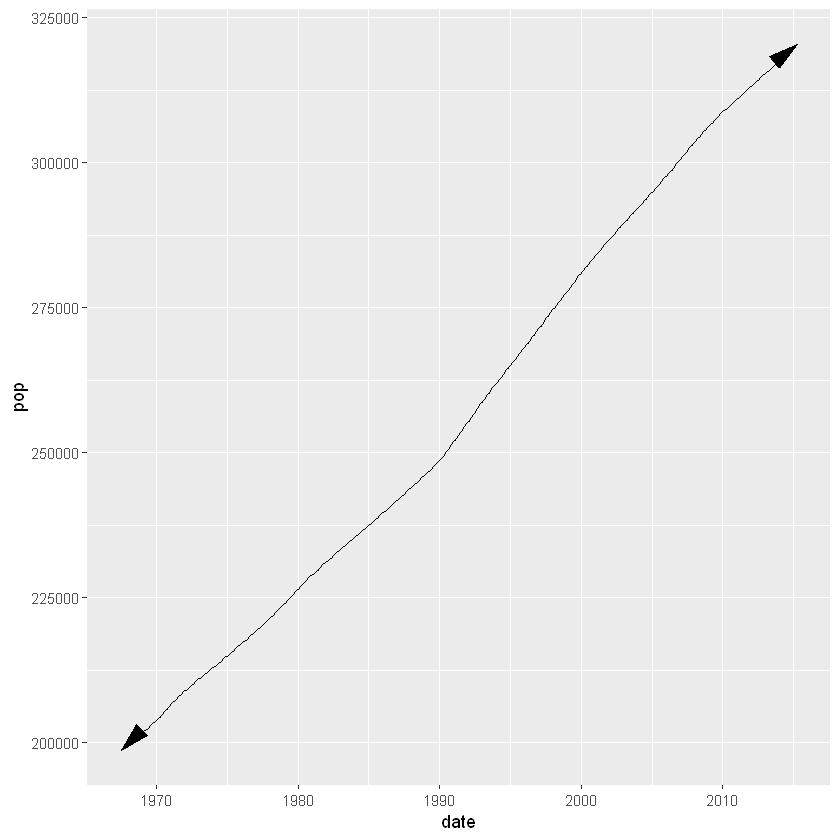

In [31]:
# Use the arrow parameter to add an arrow to the line
# See ?arrow for more details
c <- ggplot(economics, aes(x = date, y = pop))
c + geom_line(arrow = arrow())
c + geom_line(
  arrow = arrow(angle = 15, ends = "both", type = "closed")
)

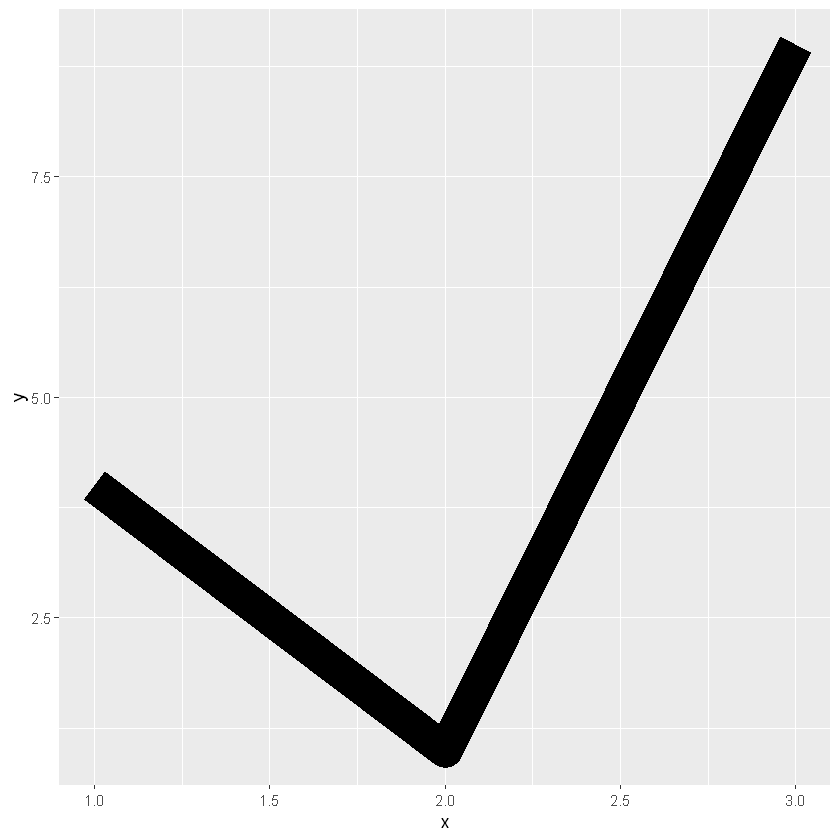

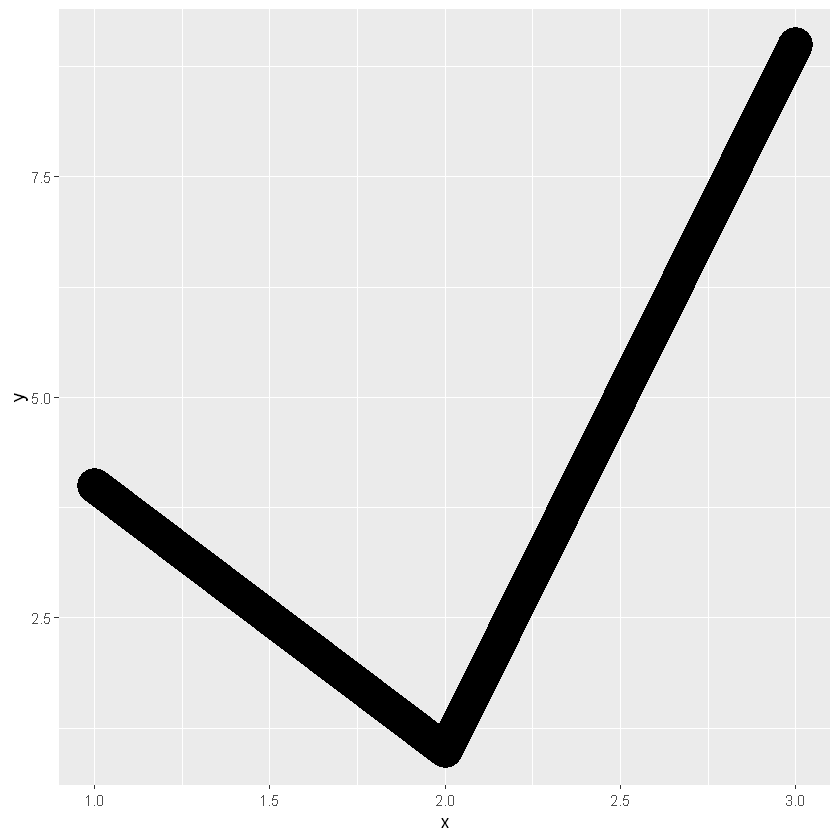

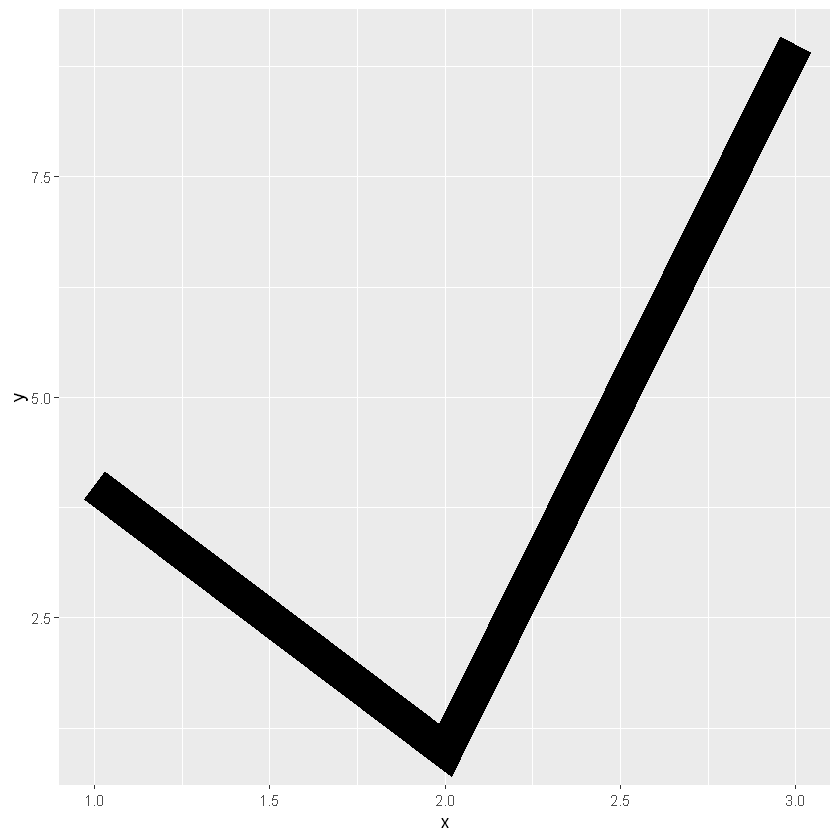

In [32]:
# Control line join parameters
df <- data.frame(x = 1:3, y = c(4, 1, 9))
base <- ggplot(df, aes(x, y))
base + geom_path(size = 10)
base + geom_path(size = 10, lineend = "round")
base + geom_path(size = 10, linejoin = "mitre", lineend = "butt")

Warning message:
"Removed 1 rows containing missing values (geom_point)."

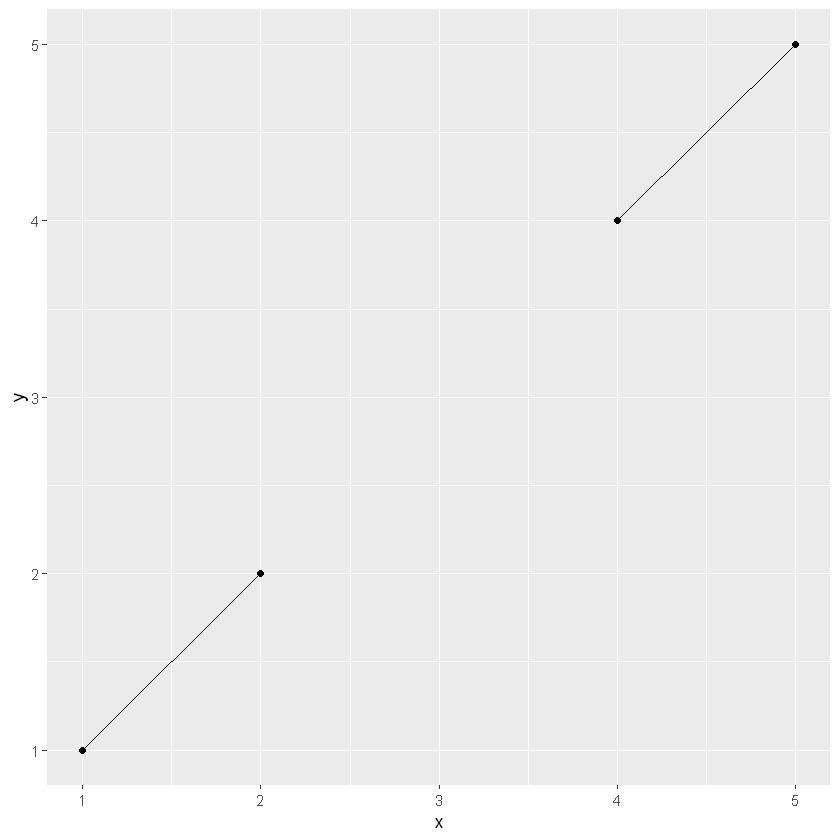

In [33]:
# You can use NAs to break the line.
df <- data.frame(x = 1:5, y = c(1, 2, NA, 4, 5))
ggplot(df, aes(x, y)) + geom_point() + geom_line()